<div style="background-color:#DADCF5; padding:0.7em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#342E37">
    <h2 style="text-align:center; color:black;">🎗️Breast Cancer: Eda in-depth & Advanced Data Visualization📉</h2>
    <h4 style="text-align:center; color:black; text-decoration:underline">Welcome🐯</h4>
</div>

Welcome to this notebook and thank you for giving me your attention!🙋🏻

In this analysis we are going to explore in depth the dataset regarding *Breast Cancer* cases, using data visualization in particular. We will look for patterns and correlations between variables, and try to understand what are the main factors that allow a woman to survive such a heavy struggle. 

As anticipated, visualization will be the main protagonist in the notebook, and I am going to completely customize the appearance of the graphs. I hope you will enjoy them and can take inspiration for your next explorations! 

*I am currently working on a second notebook focused on prediction through Machine Learning models. It will be published in the next few days.*

Also, I ask you to let me know what you think of my work, with an *upvote* or *comment*. I appreciate any kind of feedback, especially for advice on how to improve.  I am a student who wants to learn a lot in the world of Data Science, and so thank you if you will help me. ❤️

# Table of Contents

### 1. [Importing Data & Libraries 📥](#importing)
### 2. [Definitions of functions ⌨️](#functions)
### 3. [Distribution of features 📊](#distribution)
**[Categorical Variables 🔠](#categorical)**

**[Numeric Variables 🔢](#numeric)**

### 4. [Numeric Features vs Status Variable 🏷️](#num-vs-status)
### 5. [Correlation: Numeric vs Categorical 📊](#corr-num-cat)
### 6. [Correlation between Numeric Features 📉](#corr-num)
### 7. [<code>Race</code> & <code>Marital Status</code> have influence?🤔](#race-marital)
### 8. [Conclusion 🔚](#conclusion)

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="importing"><h2 style="text-align:left; color:#342E37">Importing Data & Libraries 📥</h2></a>
</div>


In addition to obviously using pandas and numpy to explore the data, I am going to make the visualizations by combining matplotlib.pyplot and seaborn. This will allow me to have very good flexibility with also good efficiency in the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer/Breast_Cancer.csv")

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.rename(columns={"Reginol Node Positive":"Regional Node Positive"}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Our data consists of just over 4000 instances, each with 16 features. In fact, there is no missing data, and this allows us, barring missing data hidden in the dataset by common values, to skip the cleaning step. 

We can also see that most of the columns are of type *object*. 
However, we note from the first printed rows that there are no storage errors, and so we do not need to perform conversions, at least for now.

In [5]:
colors = [
    "#8187dc", # Light purple
    "#04052e", # Black
    "#97dffc", #Light Blue
]

<div>
<div style="float:left; width:33.3%; background-color:#8187dc; height:50px; border-radius:0.5em 0 0 0.5em"></div>
<div style="float:left; width:33.3%; background-color:#04052e; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#97dffc; height:50px; border-radius:0 0.5em 0.5em 0"></div>
</div>

These are the colors I will use in the visualizations:

1. Light purple will be used for all those plots that do not involve color divisions based on a feature, i.e., that do not have values for `hue=`
2. Instead, light blue and black will be used to distinguish in the displays women who are currently survivors from those who did not make it. They will therefore be used as a palette where `hue="Status"`

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="functions"><h2 style="text-align:left; color:#342E37">Definitions of functions ⌨️</h2></a>
</div>


Immediately following this piece of text, hidden by default, are several blocks of code used to define the functions I will use for the visualizations. ⬇️

I have hidden that code to decrease the length of the notebook and to allow you to get to the actual visualizations quickly. If you are interested in how they are implemented, you can always see the code by clicking on the following "Show hidden code" buttons.

Please know that I have chosen to customize the graphics based on my personal taste, and trying to get the information the plot conveys to the reader right away. If you think I can improve, feel free to let me know your suggestions in the comments!💭

----

In [6]:
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

In [7]:
def count(df, x, ax, main_color=colors[0], hue=None, palette=None):
    
    sns.countplot(data=df, x=x, ax=ax, 
                  color=main_color, saturation=0.8, linewidth=3, edgecolor="black",
                  hue=hue, palette=palette)
    
    
    for container in ax.containers:
        ax.bar_label(container, 
                     color="black", fontsize=10, padding=4)
    
    ax.set_ylabel("")
    ax.set_xlabel(x, fontsize=15)
    ax.tick_params(axis='y', which='both', left=False, right=False)
    
    
    set_style(ax)

In [8]:
def hist(df, x, ax, hue=None, palette=None, main_color=colors[0], second_color=colors[1]):
    
    alpha = 0.8
    if hue:
        alpha = 0.3
    
    sns.histplot(data=df, x=x, ax=ax,
                 hue=hue, palette=palette, 
                 color=main_color, linewidth=3, bins=20, alpha=alpha,
                 kde=True, line_kws={"linewidth":1, "linestyle":"--"}
                )
    ax.lines[0].set_color(second_color)
    
    ax.set_ylabel("Number of observation")
    ax.set_xlabel(x, fontsize="x-large")
    
    set_style(ax)

In [9]:
def strip(df, x, y, ax, palette=[colors[0], colors[2]], hue=None, alpha=1):
    
    sns.stripplot(data=df, x=x, y=y, palette=palette, hue=hue, 
                  linewidth=0.5, size=4, ax=ax, alpha=alpha, edgecolor="black")
    
    ax.set_title(f"{x} vs {y}", pad=0)
    
    set_style(ax, bottom=True)

In [10]:
def cdf_plot(df, x, ax, hue=None, palette=None, main_color=colors[0]):
    
    sns.kdeplot(data=df, x=x, hue=hue, ax=ax, color=main_color,
                palette=palette,
                cumulative=True, warn_singular=False, linewidth=1, common_norm=False)
    
    set_style(ax)

In [11]:
def bar(df, x, y, ax, hue=None, palette=None, color=colors[0], order=None):
    
    sns.barplot(data=df, x=x, y=y, ax=ax, 
                hue=hue, palette=palette, color=color,
                linewidth=2, edgecolor="black", errwidth=2, capsize=0.07,
                order=order)
    
    ax.set_xlabel("")
    
    set_style(ax)

----

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="distribution"><h2 style="text-align:left; color:#342E37">Distribution of features 📊</h2></a>
</div>


In my work I will conceptually divide the columns according to the type of data they contain. This leads to the creation of two main groups: categorical and numeric. 
The names of these features will be contained in `cat_cols` and `num_cols`, respectively. 

I will, of course, treat these two types of data differently, first displaying the two types individually and then seeing the combinations and correlations between them. 

In the next cells I'll define the two lists of features.

In [12]:
cat_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
        
print(f"# Categorical Columns -> {len(cat_cols)}")
cat_cols

# Categorical Columns -> 11


['Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [13]:
num_cols = []

for col in df.columns:
    if df[col].dtype == 'int64':
        num_cols.append(col)
        
print(f"# Numeric Columns -> {len(num_cols)}")
num_cols

# Numeric Columns -> 5


['Age',
 'Tumor Size',
 'Regional Node Examined',
 'Regional Node Positive',
 'Survival Months']

We now begin with EDA.

We will begin with an exploration of the distribution of values taken by the variables. 
For both categorical and numerical, we will also go to see how this distribution behaves according to the value taken by the "Status" column.

<a id="categorical"><h3 style="color:#5860D1;" id="categorical">Categorical Variables 🔠</h3></a>

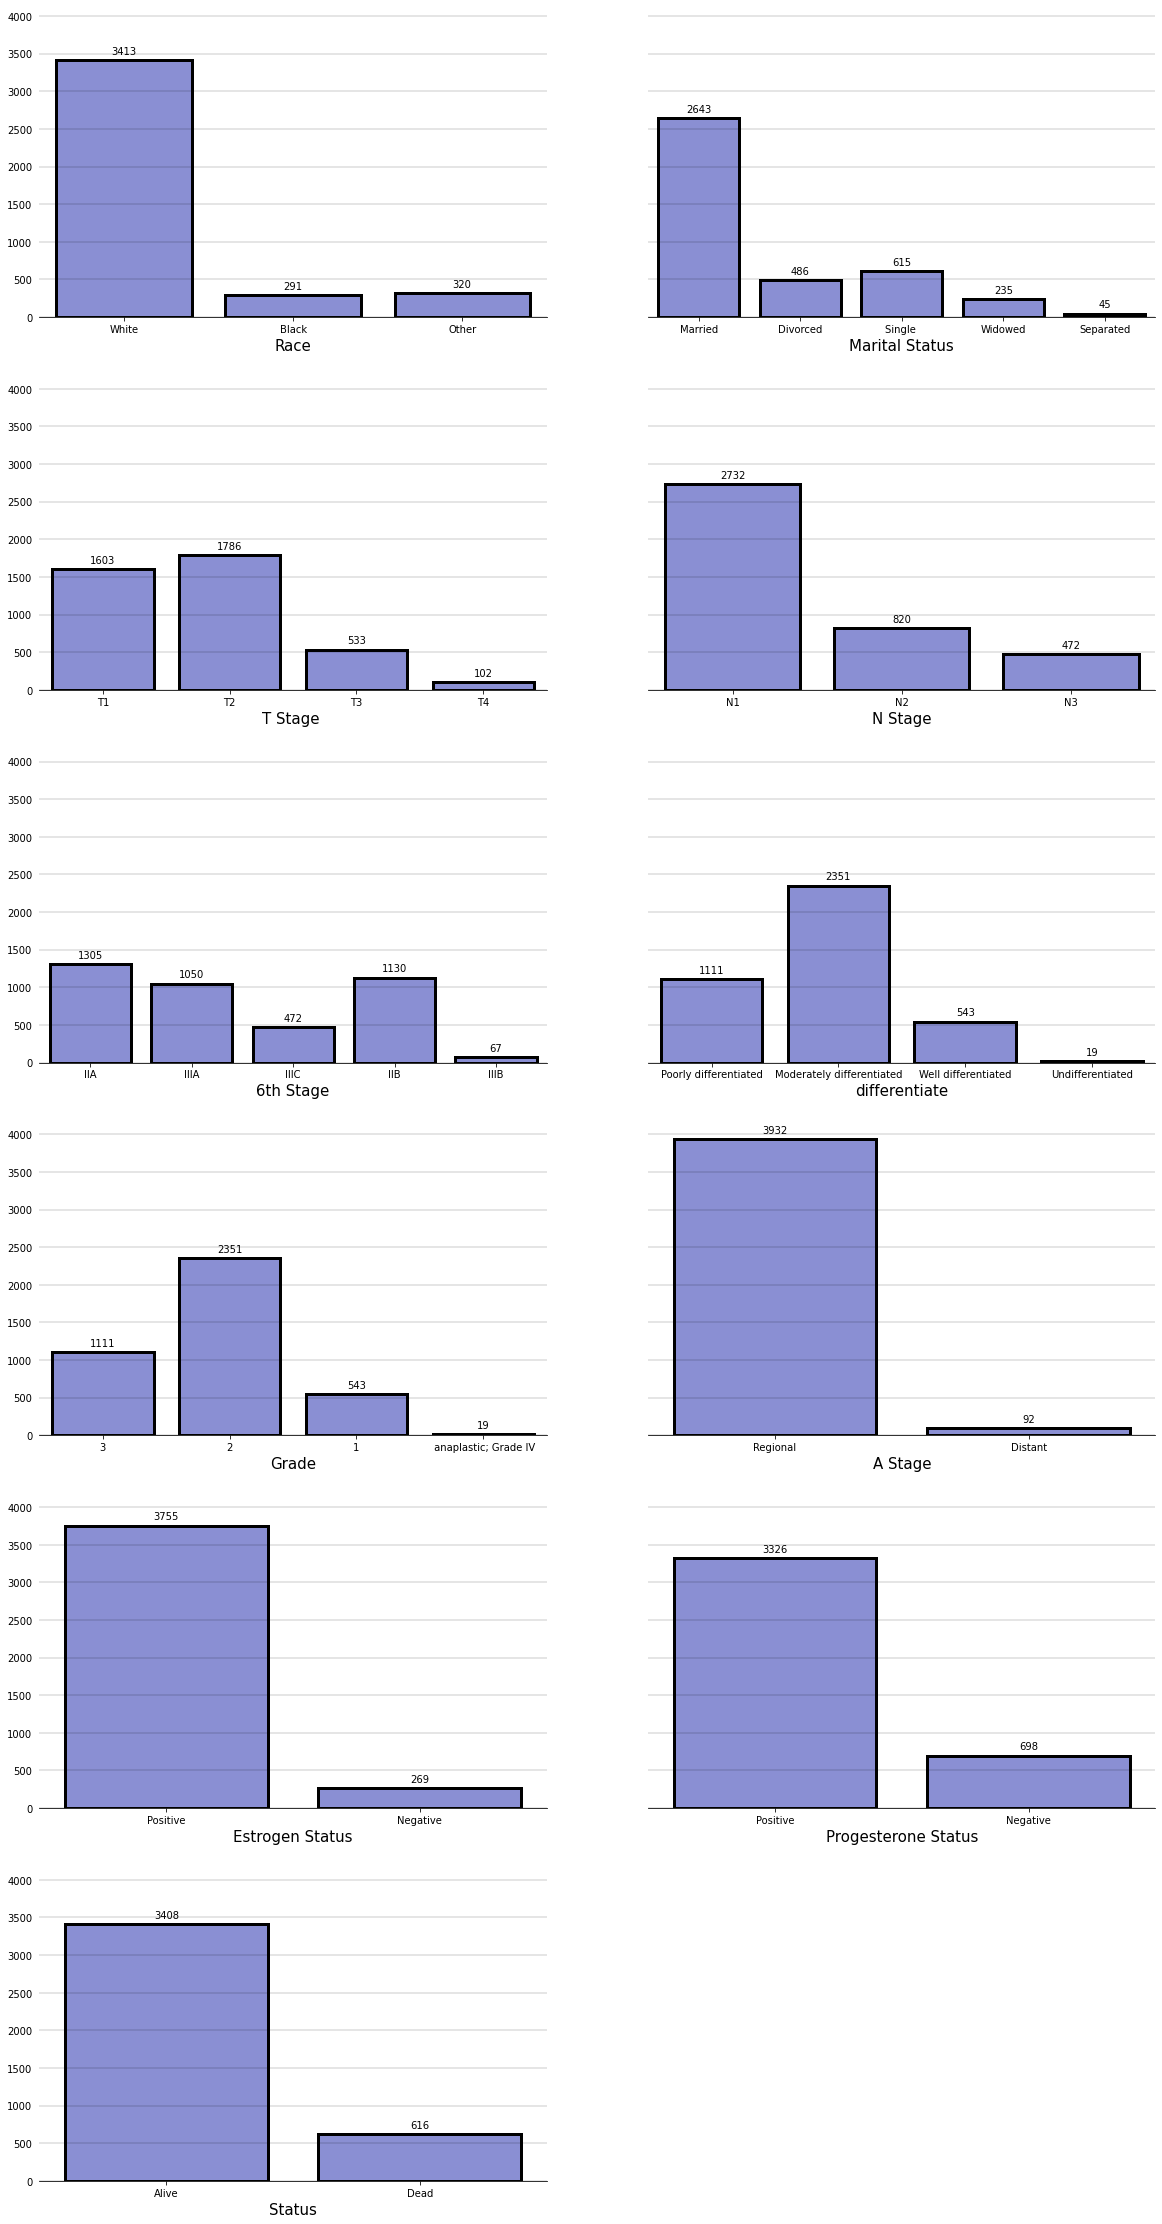

In [14]:
fig, axs = plt.subplots(6, 2, figsize=(20, 40), sharey=True)

for i, col in enumerate(cat_cols):
    ax = axs[i//2][i%2]
    
    count(df, col, ax)

fig.delaxes(axs[5,1])
    
plt.show()

We immediately notice that there are few columns with categorical values that have an equal distribution. 

Of all of them, the `Status` column is of particular importance. We can see that most instances in the dataset are about people who are currently surviving, and only about 15% about women who have died

The most unbalanced feature is `A Stage`, which has almost all instances in "Regional". 

We can also see that most of the women whose cancer is recorded in the dataset are primarily white. 
The most prevalent marital status is marriage

In the next line of code I am going to remove `Status` from the list of categorical columns. 
I do this because in the rest of the notebook that variable will always be used as a choice such as `hue=`, and removing it from the list will allow me to iterate the other features more easily.

In [15]:
cat_cols.remove("Status")

Let us now look at the distribution of categorical variables just by the value of `Status`. This will allow us to see if there are clear differences in the categories based on the number of people who did not survive.

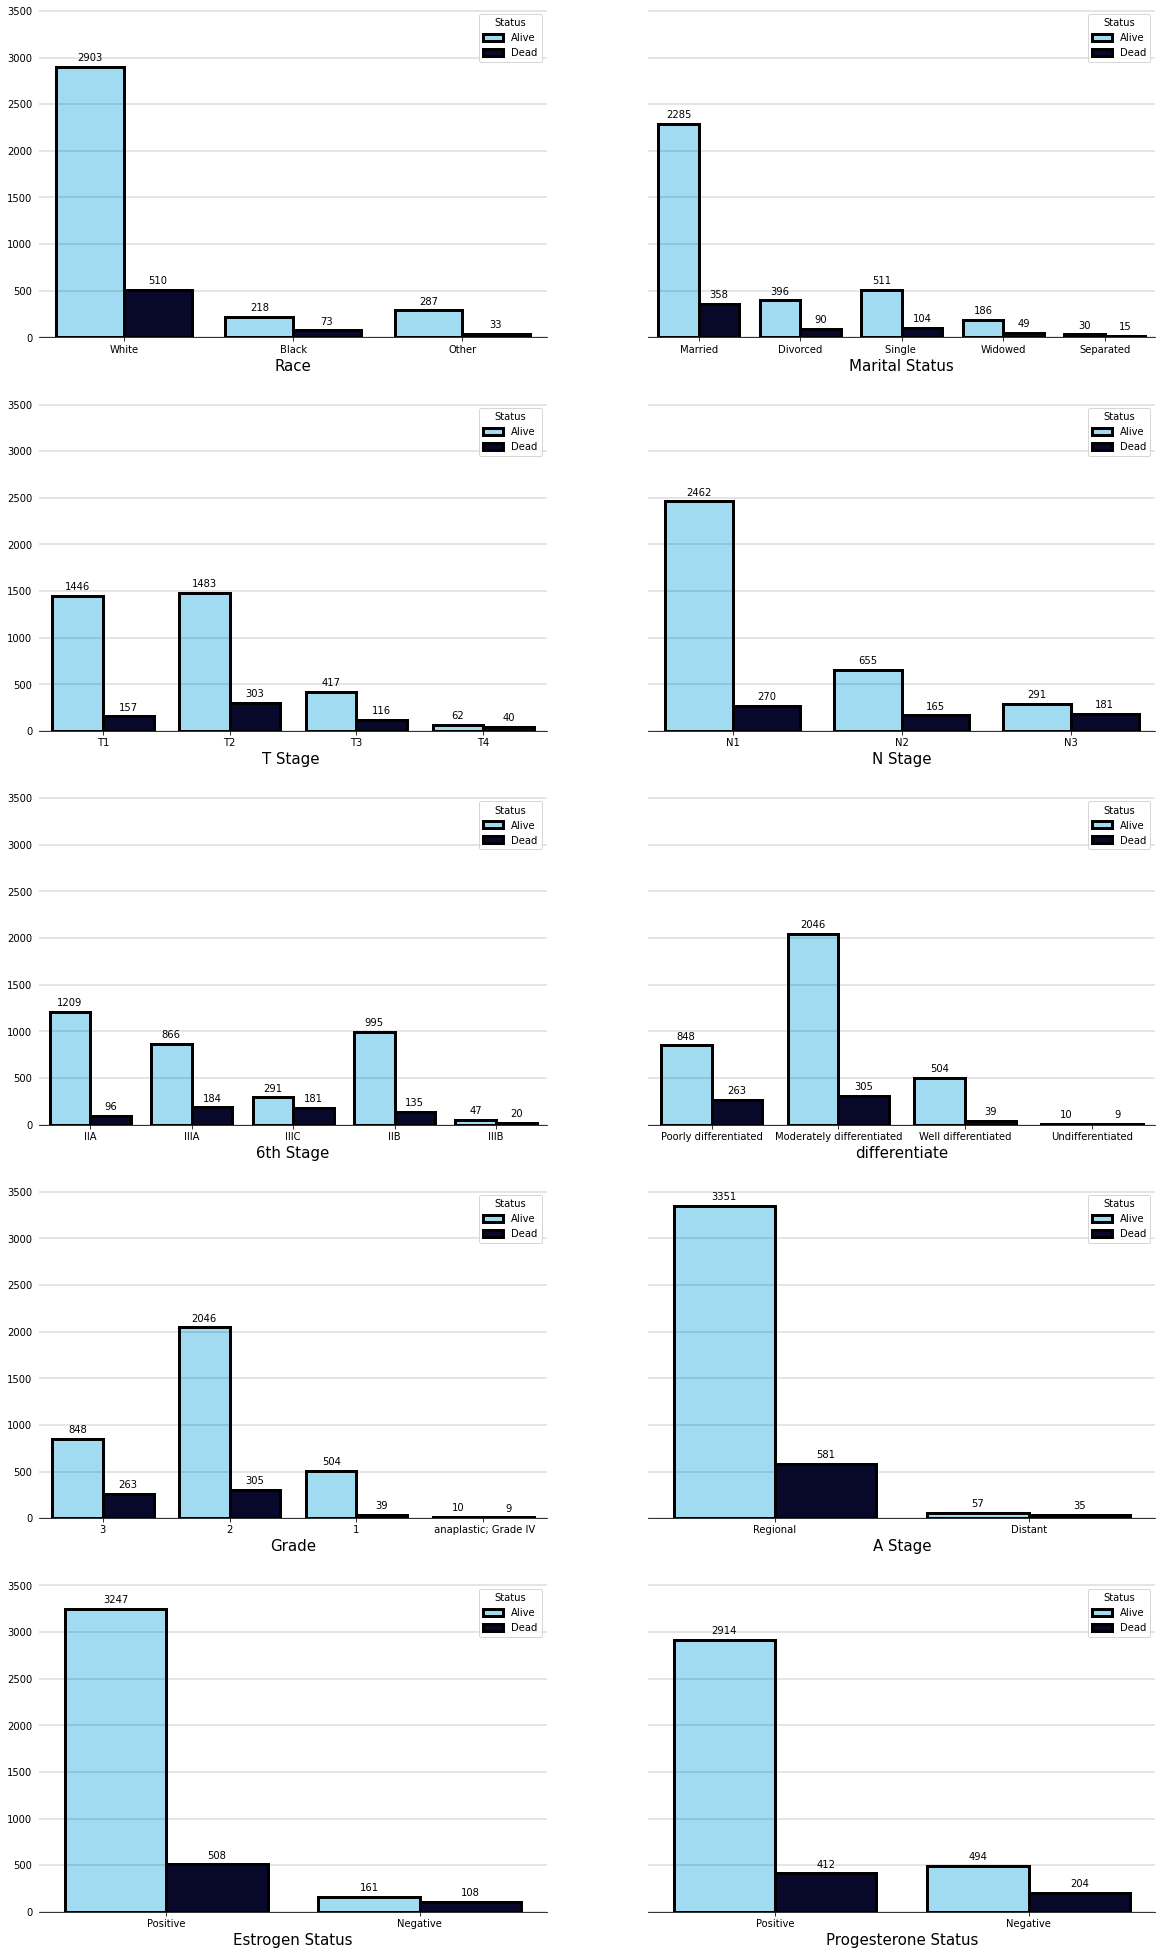

In [16]:
fig, axs = plt.subplots(5, 2, figsize=(20, 35), sharey=True)

for i, col in enumerate(cat_cols):
    ax = axs[i//2][i%2]
    
    count(df, col, ax, hue="Status", palette=[colors[2], colors[1]])

    
plt.show()

We can see that for some values the distribution as a proportion of survivors versus deceased changes dramatically. 

For example in `A Stage`, for people who have such a "*Distant*" stage, the probability of survival (according to these data) drops dramatically. 
The same is true for those women who have an "*Undifferentiated*" tumor or have a "*Grade 4*"

Unfortunately, for all three of the cases mentioned, the instances are very few out of the total, and so in theory we should not rely only on this imbalance between the proportions.

However, a knowledge base regarding the topic (or through online research) allows us to confirm what these data seem to convey: the cases I have highlighted are rarer than others, but also more deadly because of the complications they bring.

<a id="numeric"><h3 style="color:#5860D1;" id="categorical">Numeric Variables 🔢</h3></a>

Let us now look at the distribution of numerical variables by means of histograms

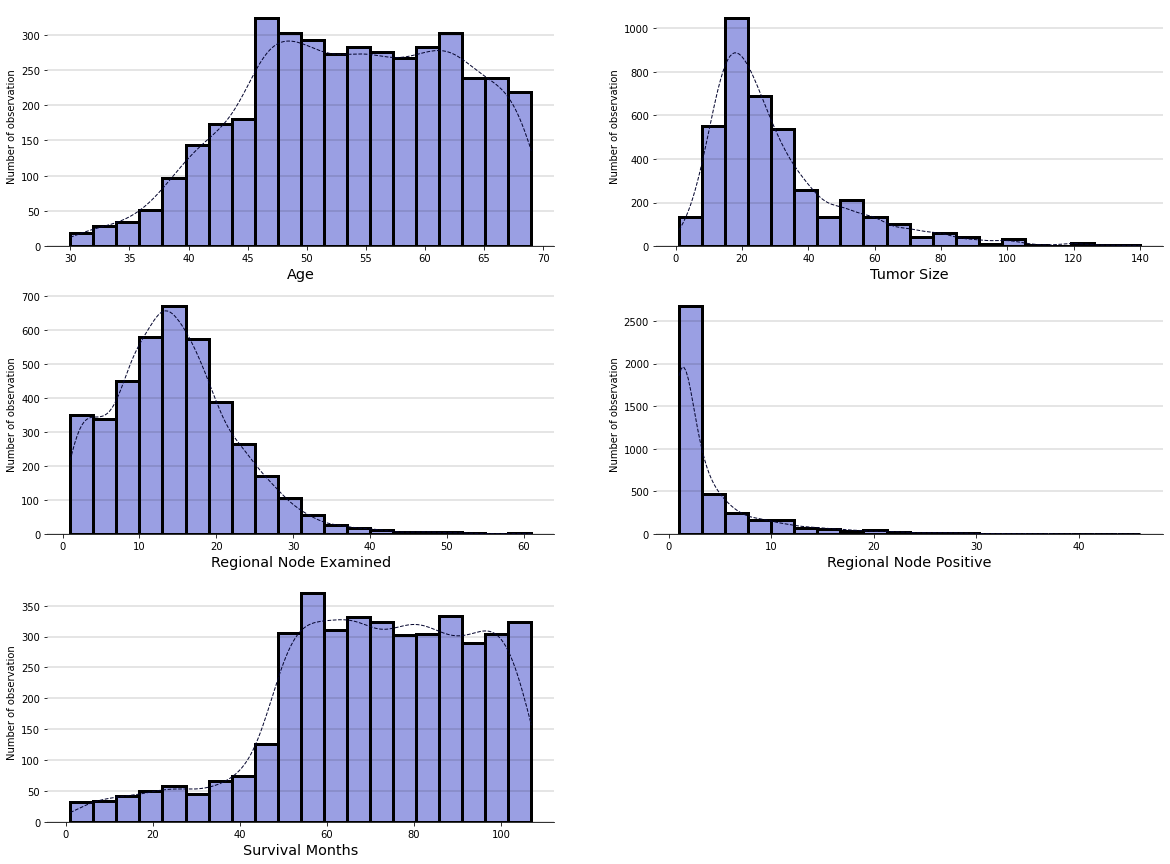

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

for i, col in enumerate(num_cols):
    ax = axs[i//2][i%2]
    
    hist(df, col, ax)
    
fig.delaxes(axs[2,1])
    
plt.show()

From the histograms we note how `Tumor Size`, `Regional Node Examined` and `Regional Node Positive` have a *right-skewed* distribution. 

At the contrrio, `Age` and `Survival Months` tend to have a *left-skewed* distribution, although less pronounced

Let us now see if we can see clear differences based on the division by `hue="Status"`

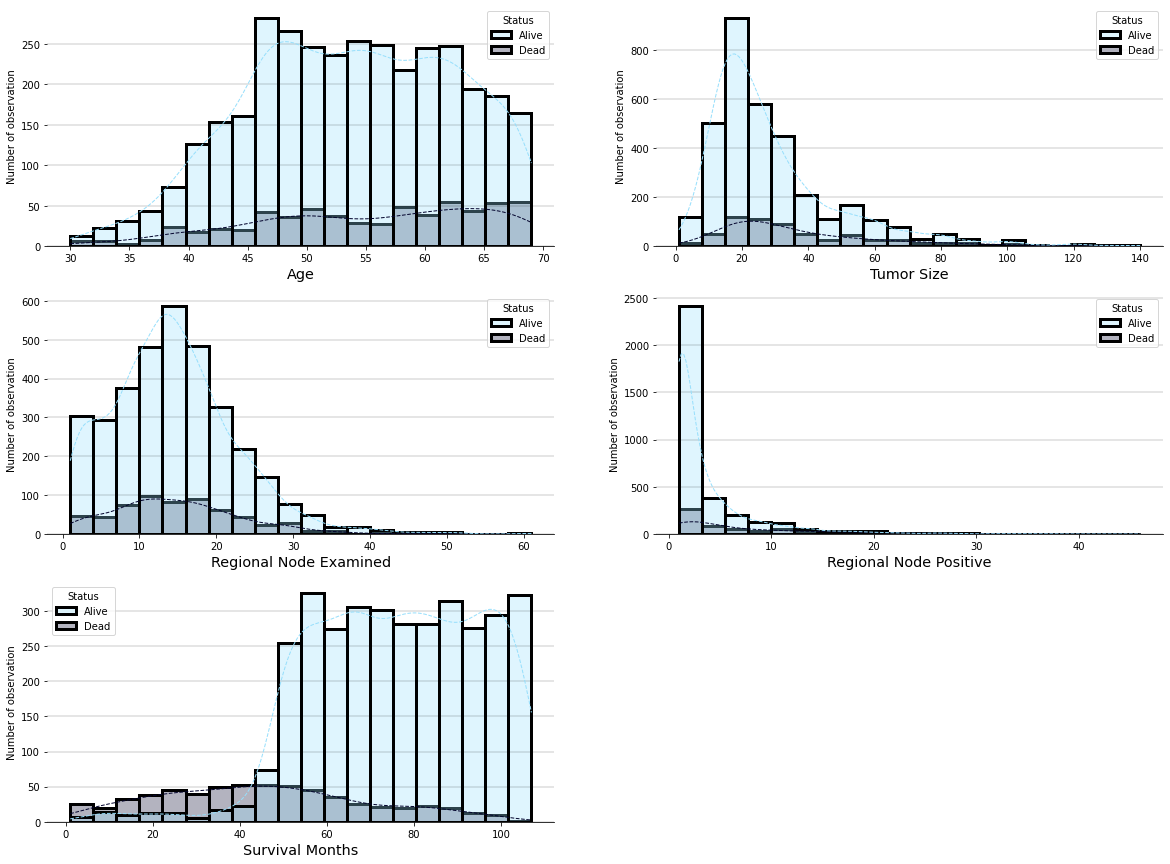

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

for i, col in enumerate(num_cols):
    ax = axs[i//2][i%2]
    
    hist(df, col, ax, hue="Status", palette=[colors[2], colors[1]])
    
fig.delaxes(axs[2,1])
    
plt.show()

In these plots what immediately jumps out is that the distribution of `Survival Months` differs greatly between women who are still alive and those who have not made it. 

For the other features, however, it is difficult to make comparisons because of the difference in recorded cases. 

However, the next section will help us shed light on this.

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="num-vs-status"><h2 style="text-align:left; color:#342E37">Numeric Features vs Status Variable 🏷️</h2></a>
</div>


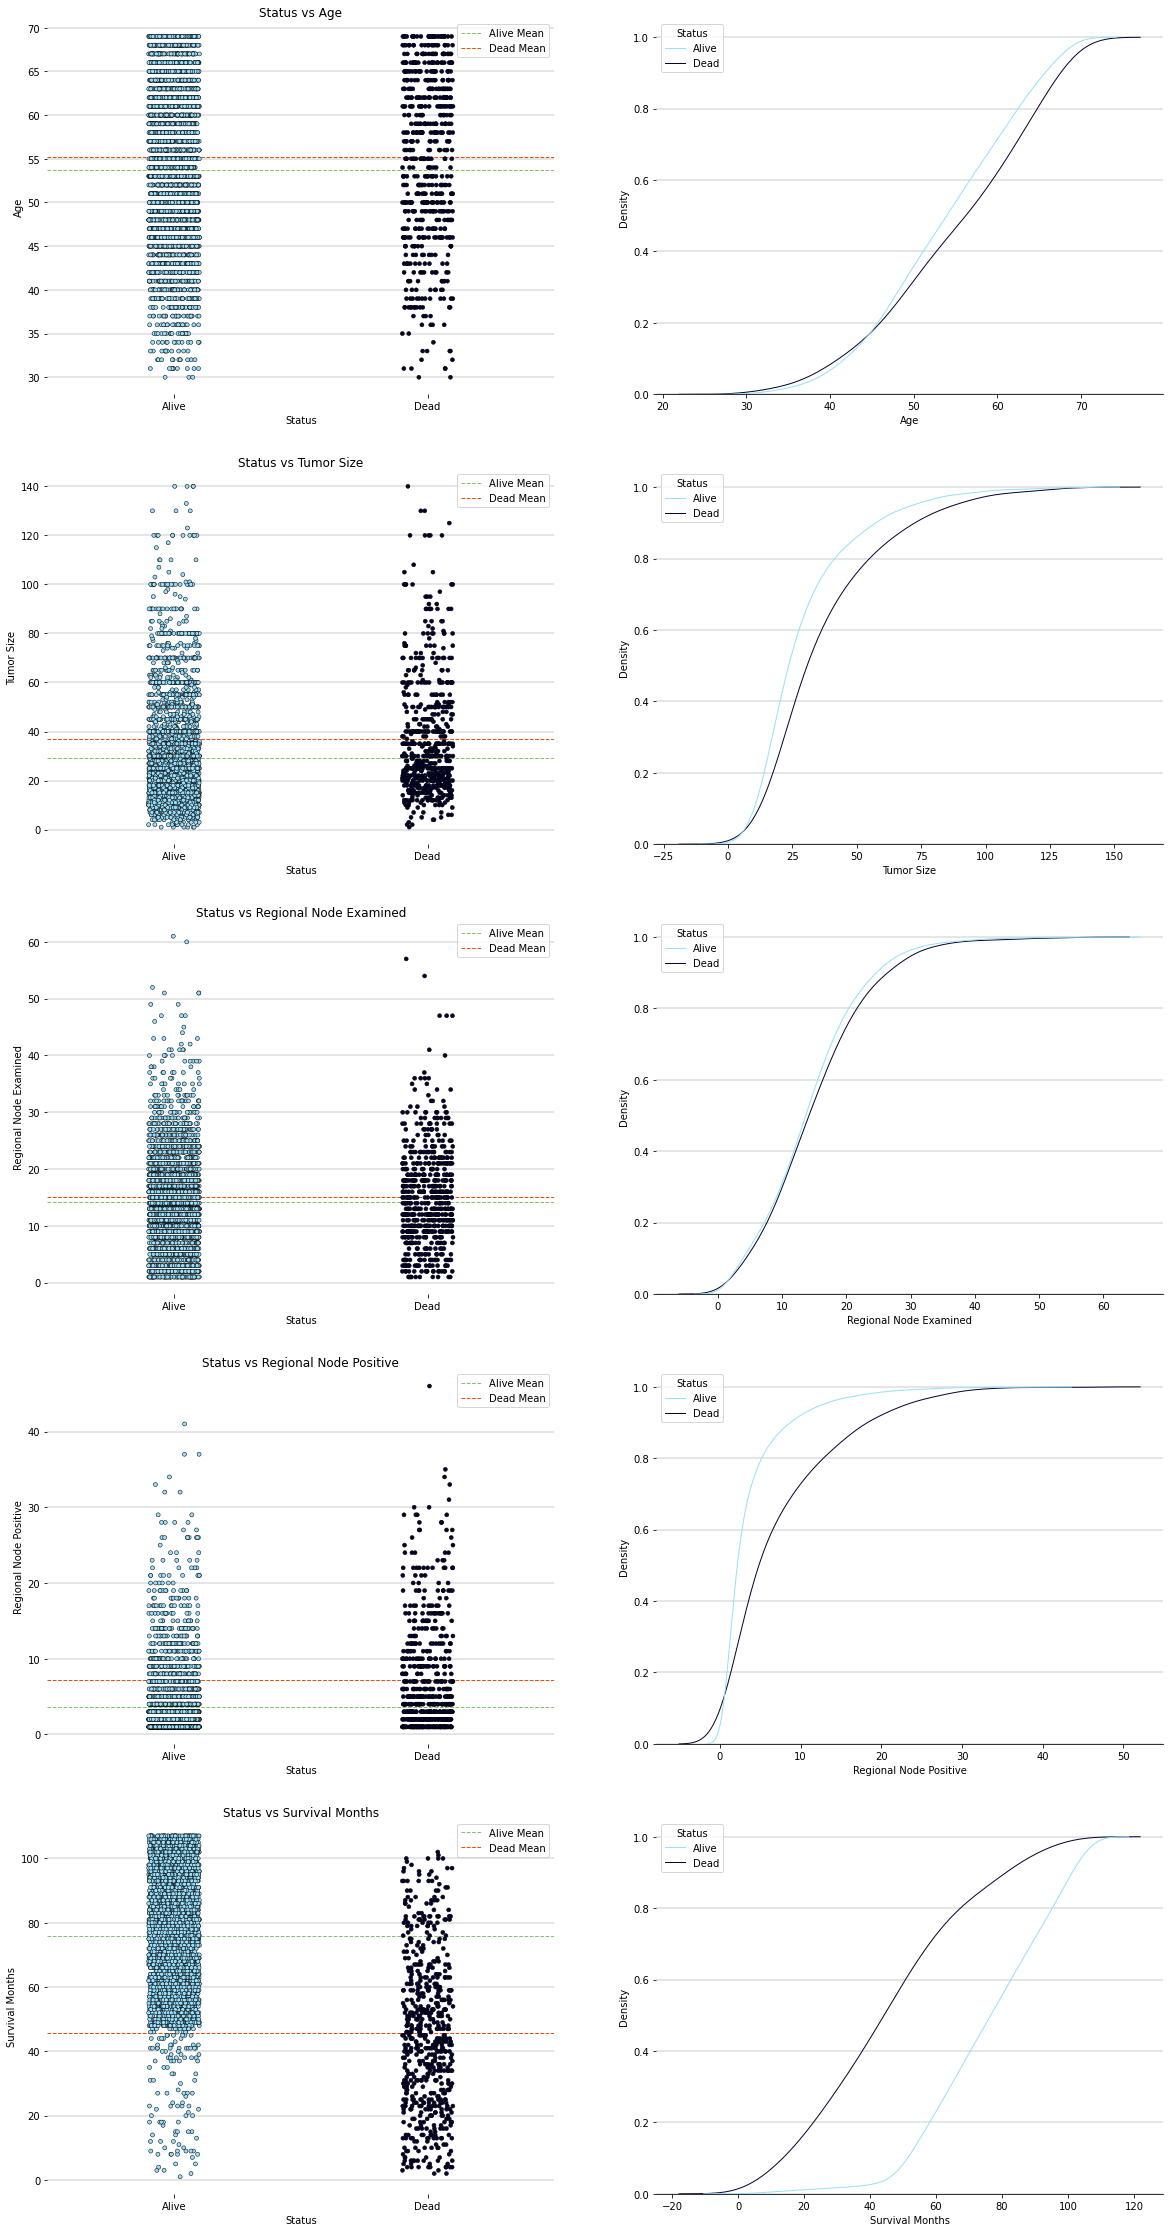

In [19]:
fig, axs = plt.subplots(5, 2, figsize=(20, 40))
i = 0
for col in num_cols:
    
    ax_left = axs[i][0]
    ax_right = axs[i][1]
    
    strip(df, "Status", col, ax_left, palette=[colors[2], colors[1]])
    ax_left.axhline(np.mean(df[df["Status"] == "Alive"][col]), linestyle="--", color="#85C270", linewidth=1, label="Alive Mean")
    ax_left.axhline(np.mean(df[df["Status"] == "Dead"][col]), linestyle="--", color="#f24b04", linewidth=1, label="Dead Mean")
    ax_left.legend()
    
    cdf_plot(df, col, ax_right, hue="Status", palette=[colors[2], colors[1]])

    i += 1
    
    
    
plt.show()

In this visualization, the differences between the two categories are well highlighted. Indeed, we can see that:

- There seems to be no significant differences according to the age of the patients

- Deceased women tend to have larger tumor size, but the correlation is not as clear-cut as one might think: There are cases of women currently alive with high cancer size. 

- While the distribution for the two categories by the number of regional nodes examined is indeed similar, the difference between them by the number of positive regional nodes is stark: a higher number of positive nodes tends to have higher mortality.

- Months of survival for those currently alive, on average, are markedly greater than those passed for deceased women. However, this high difference could be due to a mode of data collection that is not well distributed, but as I do not have more information, I cannot come to any clear conclusions.

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="corr-num-cat"><h2 style="text-align:left; color:#342E37">Correlation: Numeric vs Categorical 📊</h2></a>
</div>


Now we are going to look for correlations or patterns among the categorical columns by comparing them with the numerical ones. This will be the longest section of the notebook, and I will highlight the most important information in each plot row. 

In addition, these plots, in bars, will be divided by `Status`. 

Since there is a large amount of visualization to be done, I will consider for now only the categorical columns concerning technically the tumor, and thus leave out `Race` and `Marital Status`, which will be dealt with in the final of the notebook. 

I will also not consider the `Age` column, which is among the continuous variables the one with the least added information, in order to avoid exceeding the plot size. 

In [20]:
num_cols.remove("Age")

I also create a special function to plot graphs more quickly. It uses the already defined `bar()` function, and customizes the entire figure with title and parameters.

In [21]:
def numerics_vs_cat(cat_col, cat_order=None, num_cols=num_cols, hue="Status", palette=[colors[2], colors[1]], xtick_rotation=0):
    fig, axs = plt.subplots(1, 4, figsize=(35, 10))

    for i, col in enumerate(num_cols):

        bar(df, cat_col, col, axs[i], hue=hue, palette=palette, order=cat_order)
        axs[i].tick_params(axis="x", rotation=xtick_rotation)

    fig.suptitle(f"Categorical feature: {cat_col}", fontsize=25, fontweight='bold', y=0.92, x=0.25)

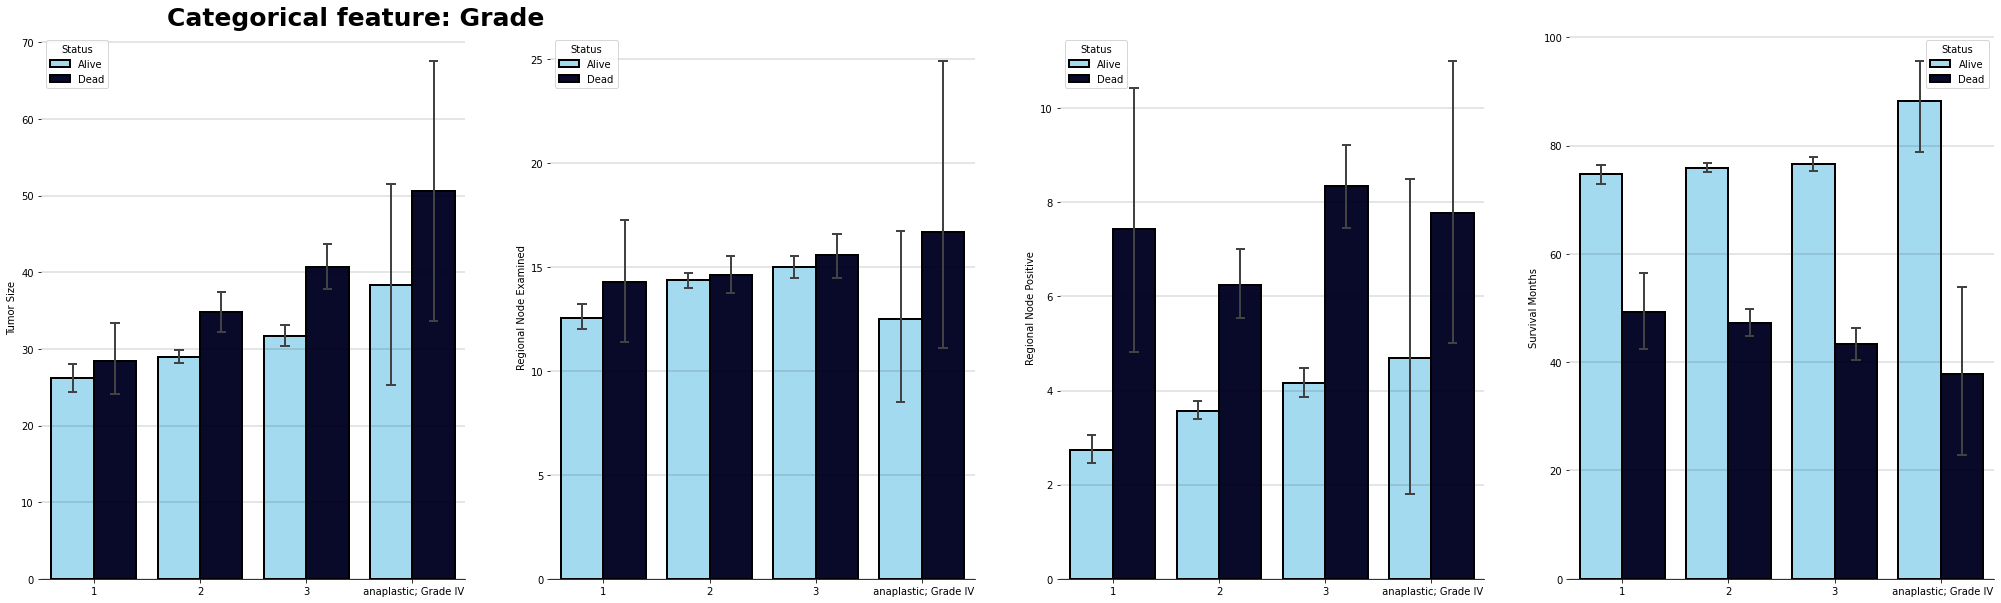

In [22]:
numerics_vs_cat("Grade", ["1", "2", "3", " anaplastic; Grade IV"])
plt.show()

**Observations**: 
- A higher grade tends to have a larger tumor size, with very high peaks in grade IV.
- Months of survival tend to decrease with higher grade.
- We have very high peaks for "Regional Node Examined" values for grade IV.

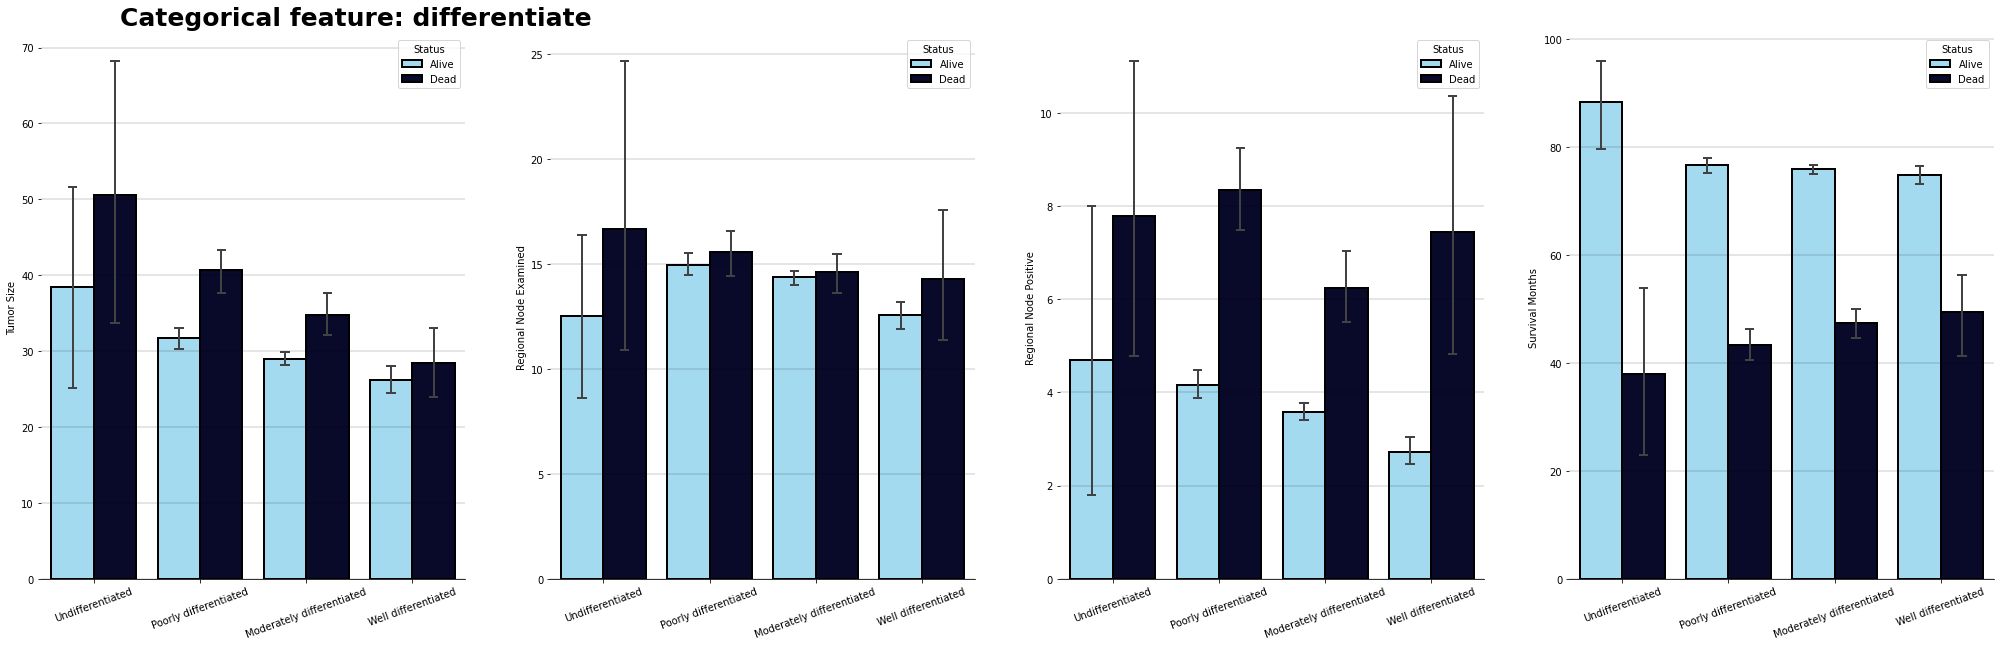

In [23]:
numerics_vs_cat("differentiate", cat_order=["Undifferentiated", "Poorly differentiated", "Moderately differentiated", "Well differentiated"],
                xtick_rotation=20)
plt.show()

**Observations**: 
- The less differentiated the tumor is, the larger its size tends to be. This is particularly stark in deceased persons.
- In deceased persons, greater differentiation is associated with more months of survival.


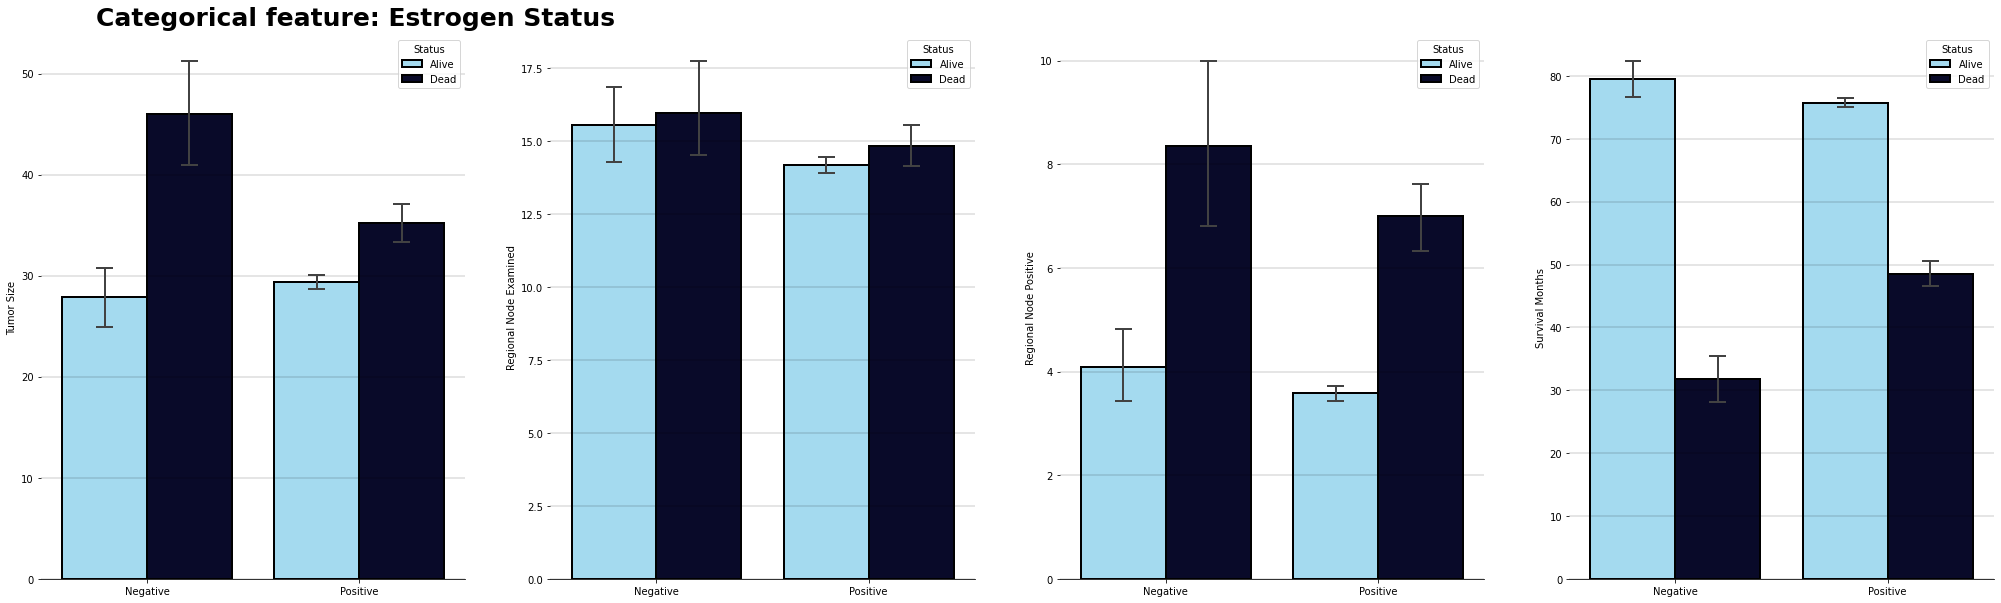

In [24]:
numerics_vs_cat("Estrogen Status", cat_order=["Negative", "Positive"])
plt.show()

**Observations**: 
- A negative estrogen status tends to have more "Regional Node Positive"

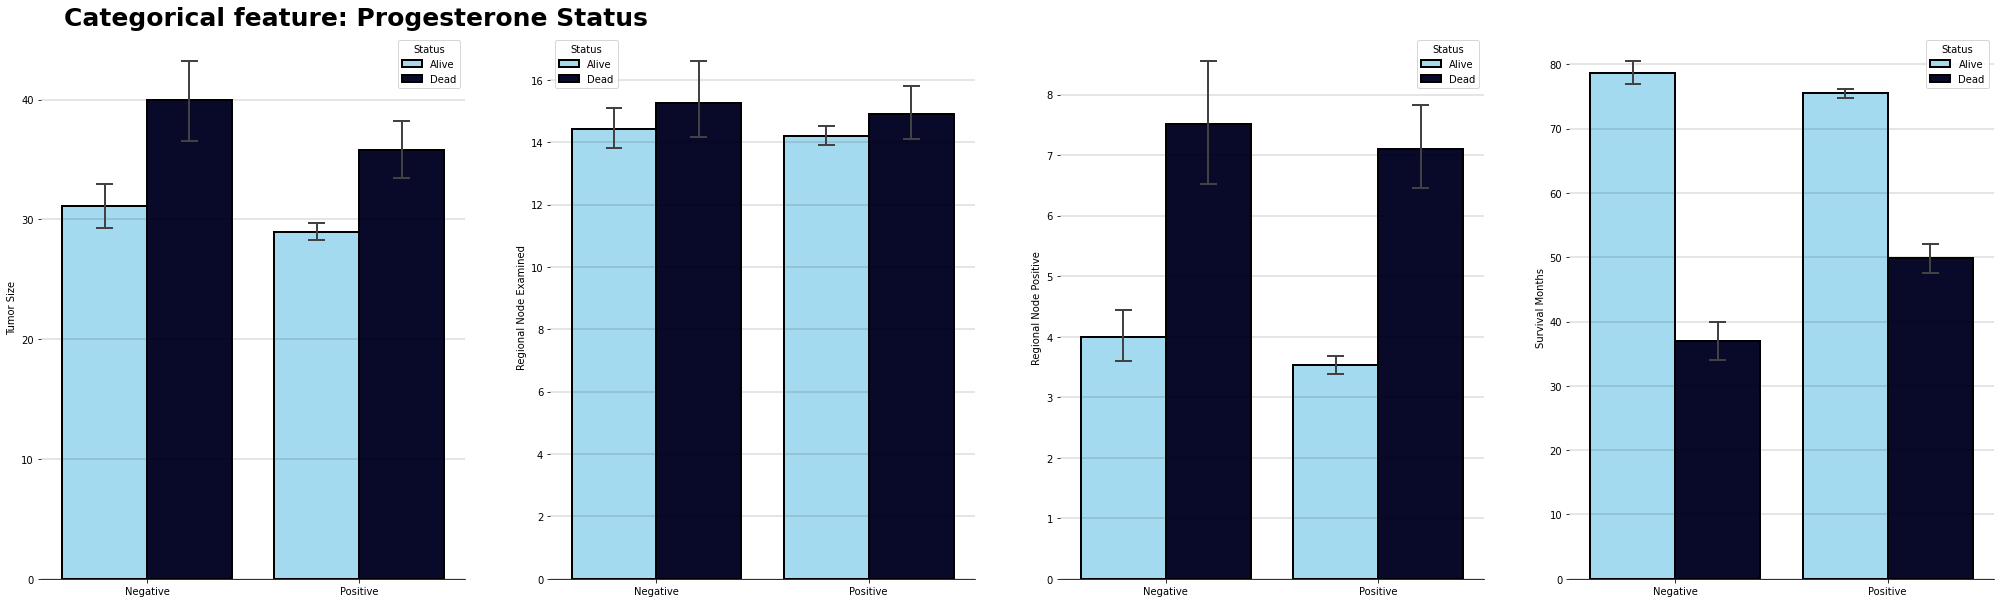

In [25]:
numerics_vs_cat("Progesterone Status", cat_order=["Negative", "Positive"])
plt.show()

**Observations**: 
- Patients with a Progesterone negative status tend to have slightly larger tumor size.
- Patients who have already died tend to have survived fewer months with a progesterone-negative status.

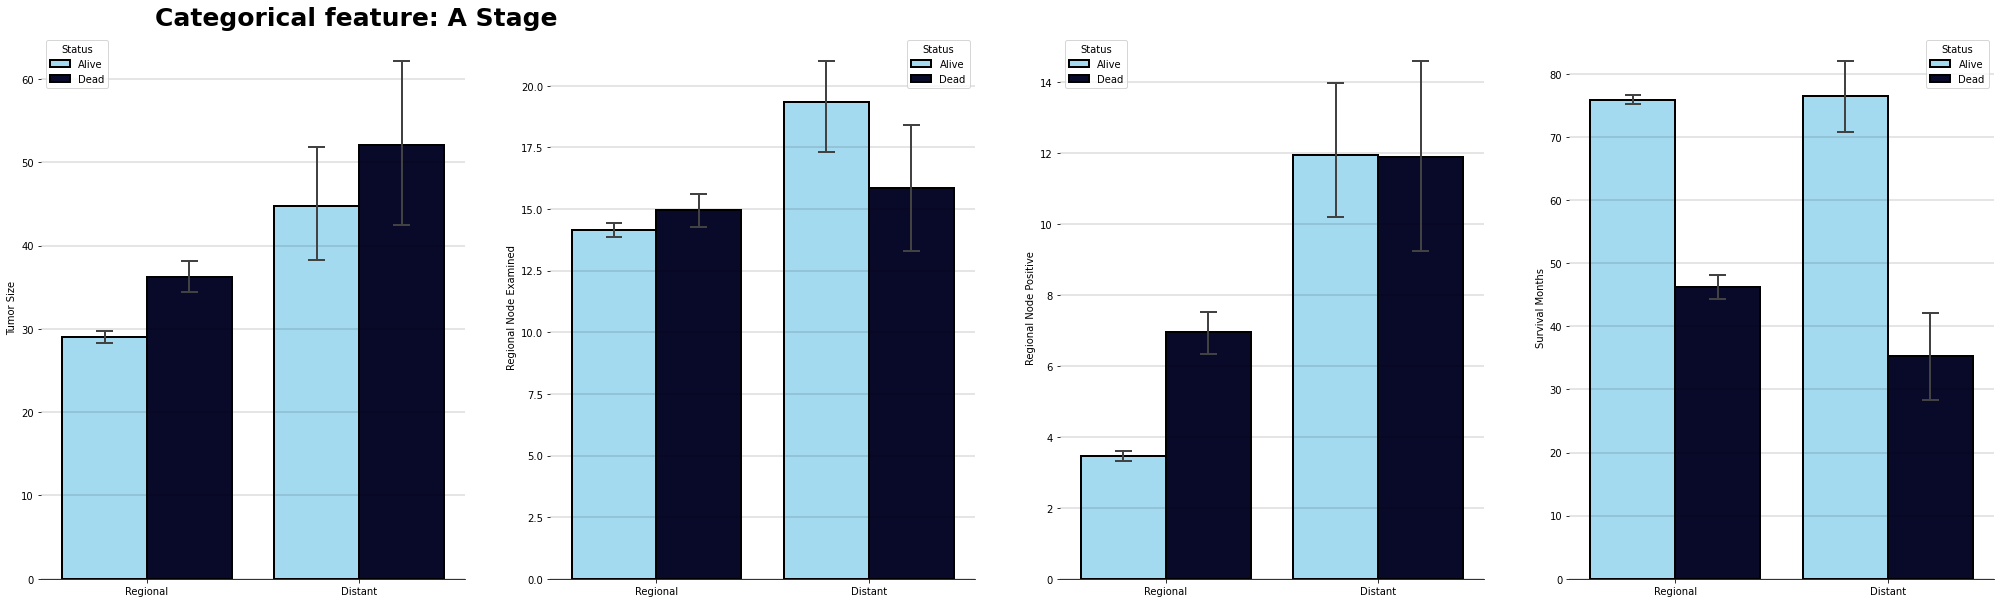

In [26]:
numerics_vs_cat("A Stage")
plt.show()

**Observations**: 
- Tumor size tends to be greater in "distant" cases
- Positive regional nodes are markedly greater for "distant" cases, but there is no clear difference between living and dead.

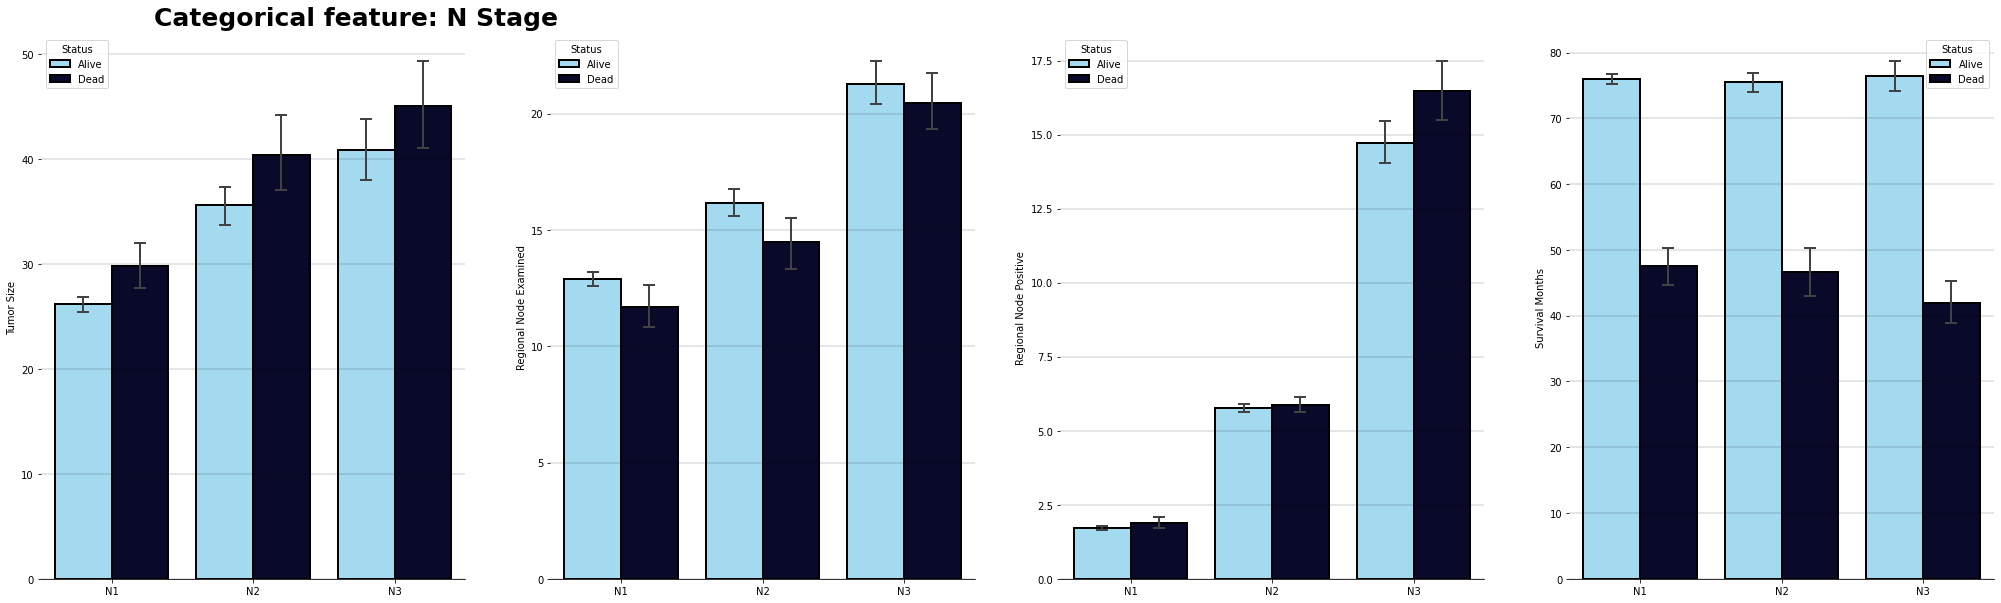

In [27]:
numerics_vs_cat("N Stage")
plt.show()

**Observations**: 
With a higher N stage, it tends to grow:
- The size of the tumor
- The number of regional nodes examined
- The number of positive regional nodes

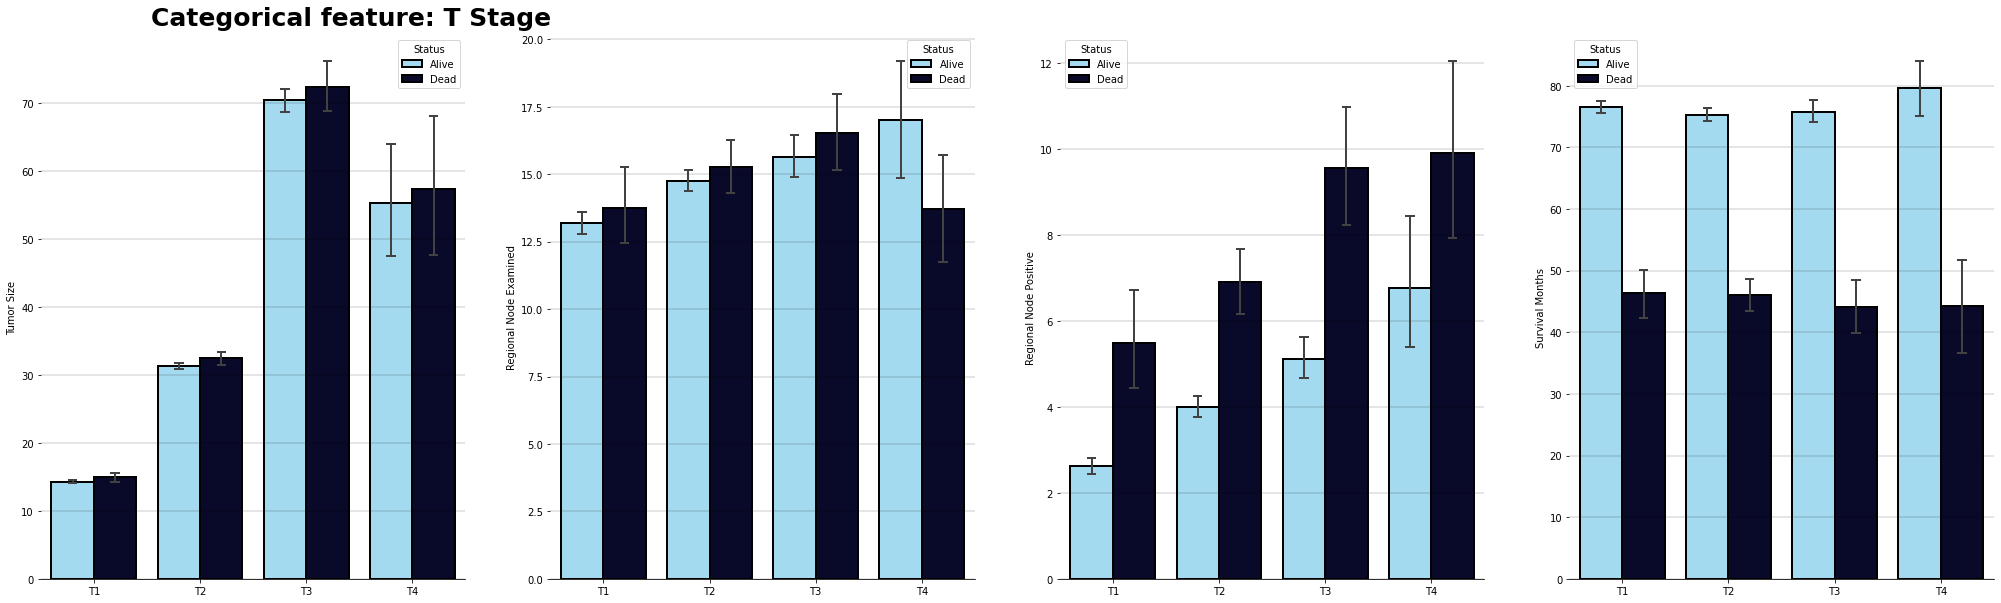

In [28]:
numerics_vs_cat("T Stage ")
plt.show()

**Observations**: 
- With higher T stage the tumor size tends to be larger, with a particular peak in T3. This is *probably* due to the paucity of cases with a T4 Stage
- Both the number of regional nodes examined and the number of positive regional nodes tend to increase with higher stage.
- There appears to be no difference for survival months based on the type of T Stage

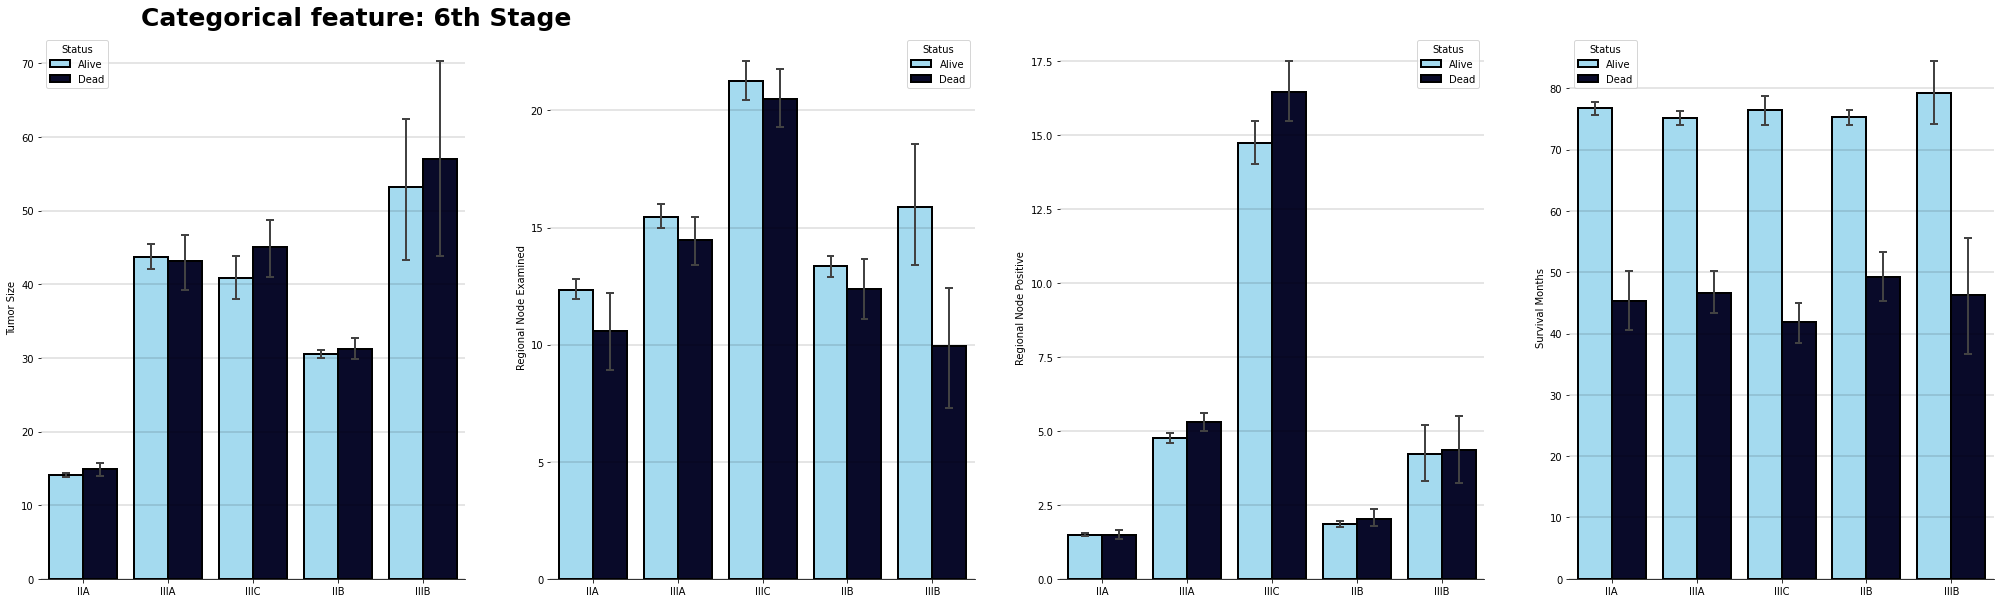

In [29]:
numerics_vs_cat("6th Stage")
plt.show()

**Observations**: 
- Type IIIC 6th stage has significantly higher values in positive regional nodes than in the other categories, and slightly higher values for regional nodes examined.

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="corr-num"><h2 style="text-align:left; color:#342E37">Correlation between Numeric Features 📉</h2></a>
</div>


We will now go on to look for correlations among the numerical variables. We can therefore add the `Age` column again to the corresponding list.

We will proceed by means of an `sns.heatmap()` containing the Pearrson correlation indices and later by means of an `sns.paiplot()`, which will allow us to visualize the position of each instance according to the values taken by the features.

In [30]:
num_cols.append("Age")

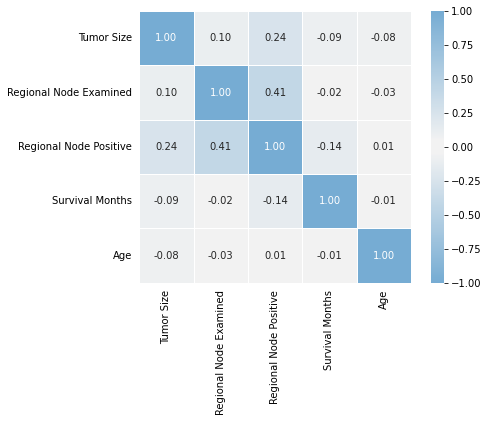

In [31]:
corr = df[num_cols].corr()
 
# I create my own palette to use
palette = sns.diverging_palette(236, 236, s=57, l=68, as_cmap=True, sep=15)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor="white",
               vmin=-1, vmax=1, fmt=".2f")

# Changes for aesthetics
ax.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False
    )

plt.show()

We note that the only noteworthy correlations are between `Tumor Size` and the number of `Regional Nodes Positive` (0.24) and the predictable relationship between `Regional Nodes Examined` and `Regional Nodes Positive` (0.41).

Although these two relationships are not particularly strong either, the other linear correlations are even weaker

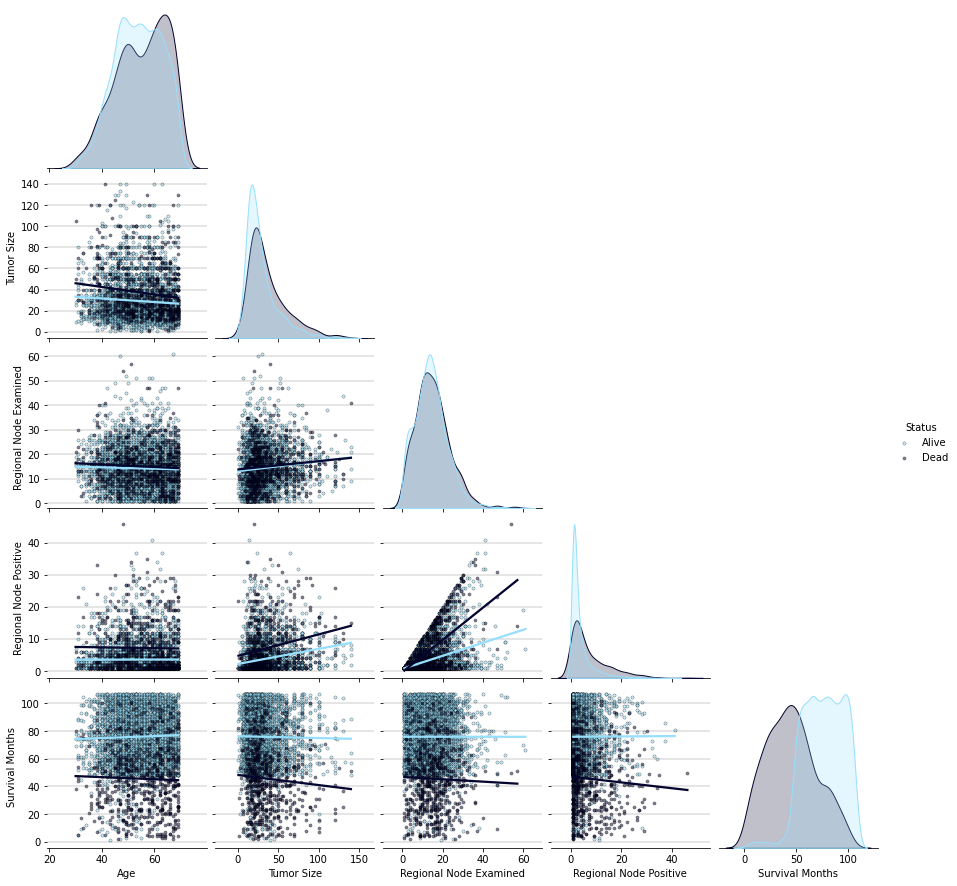

In [32]:
g = sns.pairplot(df, hue="Status", palette=[colors[2], colors[1]], corner=True,
            kind="reg", 
            plot_kws={
                "ci":None,
                "scatter_kws": {
                    "alpha":0.5, "s":10, "linewidth":0.5, "edgecolor":"black"
                }},
            diag_kws={
                "common_norm":False
            })

for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)

plt.show()

This graph confirms everything highlighted earlier in the notebook:

1. `Tumor Size` and `Regional Node Positive` are the variables with higher correlation than `Status`

2. `Survival Months` has much higher values for women currently living

3. There are no clear correlations among the other variables

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="race-marital"><h2 style="text-align:left; color:#342E37"><code>Race</code> & <code>Marital Status</code> have influence?🤔</h2></a>
</div>


As anticipated, in the conclusion of the notebook we will try to understand whether variables that are theoretically irrelevant to a disease, have instead statistically relevant

We have seen throughout the paper how the two variables of greatest importance in the course of disease are `Tumor Size` and `Regional Node Positive`

 We will therefore use these variables to look for differences between categories.

### 1. Race

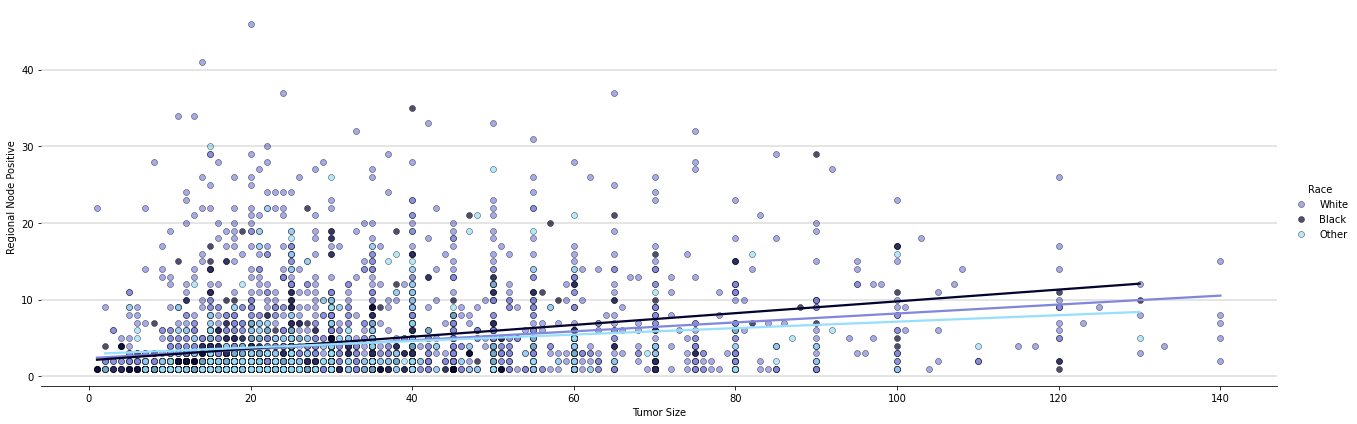

In [33]:
g = sns.lmplot(data=df, x="Tumor Size", y="Regional Node Positive", 
               hue="Race", palette=colors, ci=None, height=6, aspect=3, 
              scatter_kws={
                  "alpha":0.7,
                  "edgecolor":"black",
                  "linewidth":0.5
              })

for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)
plt.show()

We note from the graph how there are no such clear differences to state correlations between the categories and the course of the disease.

### 2. Marital Status

In [34]:
# I add colors to the list to equalize the number of categories
colors.append("#D881DB")
colors.append("#DCD67F")

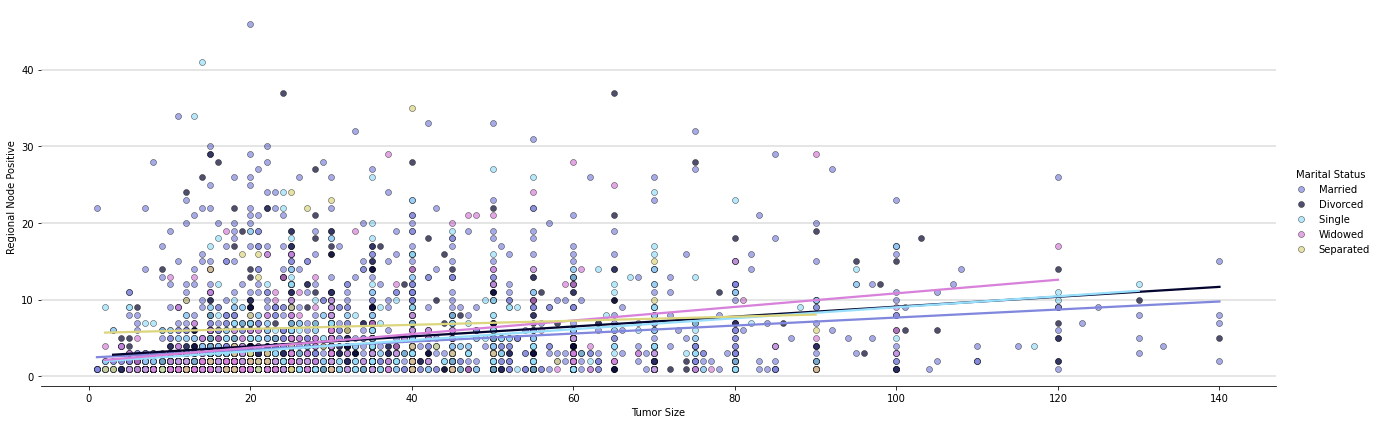

In [35]:
g = sns.lmplot(data=df, x="Tumor Size", y="Regional Node Positive", hue="Marital Status",
               palette=colors , ci=None, height=6, aspect=3, 
              scatter_kws={
                  "alpha":0.7,
                  "edgecolor":"black",
                  "linewidth":0.5
              })

for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)
plt.show()

Again, we do not have enough data to state anything certain, but it is interesting to note that the highest values for both variables ( and thus probably higher mortality ) are from women who are widowed, and thus likely to have experienced a lot of stress. In contrast, married women, who are assumed to receive support from family, tend to have the lowest values.
But I reiterate that we cannot say anything since the data are too few and poorly distributed (few cases of widowed women and many of married women). 

<div style="background-color:#E4E5F7; padding-left:1em; border:solid; border-width:0.2em 0 0.2em 0; border-color:#5860D1">
    <a id="conclusion"><h2 style="text-align:left; color:#342E37">Conclusion 🔚</h2></a>
</div>


Thank you for giving me your attention!❤️

I really hope you enjoyed my work! 
If so, I ask you to leave an upvote⬆️ to support me and let me know what you think via a comment 💭.

Also if you have any advice I would really appreciate it if you would write it down! I am a student and still have to learn a lot!

Thanks again and happy coding!❤️👨🏻‍💻

- An Italian Guy 🐯